# <hr>
# <center> Fraud detection </center>
# <hr>


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', 100)

In [14]:
Assure = pd.read_csv('../Data/assure.csv', sep = ';')
BonusMalus = pd.read_csv('../Data/classBonusMalus.csv', sep = ';')
Epave = pd.read_csv('../Data/epave.csv', sep = ";")
#Marque = pd.read_excel('../Data/marque.xlsx', sep = ';')
Police = pd.read_csv('../Data/Police.csv', sep = ';')
Sinistre = pd.read_csv('../Data/Sinistre.csv', sep = ';')
#Usage = pd.read_excel('../Data/Usage.xlsx', sep = ';')
UsageCGA = pd.read_csv('../Data/UsageCGA.csv', sep = ';')
Vehicule = pd.read_csv('../Data/vehicule.csv', sep = ';')

In [15]:
sns.set(rc = {
    'axes.facecolor':'#1e1e1e',
    'axes.edgecolor': 'grey',
    'text.color': 'grey',
    'figure.facecolor':'#1e1e1e',
    'axes.labelcolor': 'grey',
    'xtick.color': 'grey',
    'ytick.color': 'grey',
    'grid.color': 'grey',
    'grid.linestyle': 'dotted',
})

# <hr>
# <center> 1.1 vehicles with several contracts in progress </center>
# <hr>

In [16]:
BonusMalus_duplique = BonusMalus[BonusMalus['vehicule_id'].duplicated(keep=False)]

In [17]:
# We check the police status of cars that have multiple contracts
BonusMalus_duplique = pd.merge(left=BonusMalus_duplique, right=Police[["id","Etat_Police"]], left_on='police_id', right_on='id')

In [18]:
BonusMalus_duplique=BonusMalus_duplique.where(BonusMalus_duplique['Etat_Police'] =='V').dropna(how='all')

In [19]:
BonusMalus_duplique.shape

(815, 28)

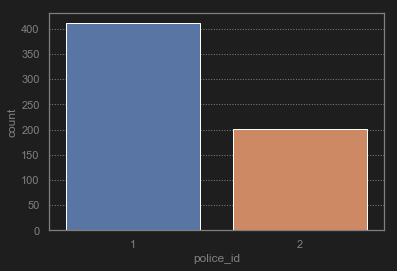

In [20]:
test=BonusMalus_duplique.groupby('vehicule_id')[['police_id']].count()
sns.countplot(test['police_id'])

## `=> There are 815 car_id that have multiple current policy contracts

# <hr>
# <center> 1.2 vehicles with several assure_id with a current contract </center>
# <hr>

In [21]:
# Each car how many owns
Voiture_plusClients = BonusMalus.groupby('vehicule_id')[['assure_id']].count().sort_values(by='assure_id',ascending=False).reset_index()

In [22]:
Voiture_plusClients.head()

,vehicule_id,assure_id
0,81678,3
1,159804,3
2,7541,3
3,513534,2
4,196864,2


In [23]:
# We only leave cars that have more than one owner
Voiture_plusClients=Voiture_plusClients.where(Voiture_plusClients['assure_id']>1).dropna(how='all')

In [24]:
Voiture_plusClients.shape

(659, 2)

In [25]:
listeVehicule=Voiture_plusClients['vehicule_id'].values

In [26]:
# We search in BonusMalus the vehicle_id of the listVehicle list
dfVoiture=BonusMalus[BonusMalus['vehicule_id'].isin(listeVehicule)]

In [27]:
# We check if the contract is in progress
dfVoiture=dfVoiture.where(dfVoiture['CONTRAT_EN_COURS']==1).dropna(how='all')

In [28]:
dfVoiture.shape

(1110, 26)

In [29]:
############################
# 2nd method: we look in the table Police or police_id = 'V'

In [30]:
dfVoiture2=BonusMalus[BonusMalus['vehicule_id'].isin(listeVehicule)]

In [31]:
# We merge with the police table and we only leave police_id = 'V'
dfVoiture2= pd.merge(left=dfVoiture2, right=Police, left_on='police_id', right_on='id')

In [32]:
dfVoiture2=dfVoiture2.where(dfVoiture2['Etat_Police'] =='V').dropna(how ='all')

In [33]:
dfVoiture2Finale=dfVoiture2.drop_duplicates(subset='vehicule_id', keep='first')

In [34]:
dfVoiture2Finale.shape

(613, 43)

In [35]:
dfVoiture2Finale.head()

,id_x,police_id,vehicule_id,assure_id,souscripteur_id,classeBonusMalus,classeBonusMalusCompagnie,classeBonusMalusCGA,coefBonusMalus,coefBonusMalusCompagnie,coefBonusMalusCGA,DATE_AFFECTATION,CONTRAT_EN_COURS,Etat_Donne,bonus,ETAT_VEHICULE,DATE_RETRAIT,date_Calcule,date_Occurence,date_changement_etat,dernierClassBonusMallus,consulter,codeUsage,codeGouvernorat,dateChangementVehicule,statut,id_y,codeCompagnie,codeAgence,typeIntermediaire,code_Courtier_CGA,numPolice,naturePolice,typePolice,dateEffetPolice,dateEcheancePolice,dateExpirationPolice,verouillageModifPolice,Etat_Police,RESILIATION_ECHEANCE,DATE_RESILIATION,Date_Suspenssion,dateRemiseEnVigueure
1,38511.0,38515.0,30384.0,28052.0,28052.0,3.0,3.0,3.0,100.0,100.0,100.0,2017-09-08 00:00:00.000000,1.0,NaN,0.0,V,NaN,2017-09-08 00:00:00.000000,2017-09-08 00:00:00.000000,NaN,1.0,NaN,10.0,NaN,NaN,NaN,38515.0,1.0,683.0,1.0,NaN,201750000071826,T,I,2017-09-08,NaN,2018-09-07,0.0,V,NaN,NaN,NaN,NaN
2,449889.0,445379.0,383248.0,368298.0,368325.0,2.0,2.0,2.0,90.0,90.0,90.0,2018-06-20 00:00:00.000000,1.0,NaN,0.0,V,NaN,2017-06-20 00:00:00.000000,2018-06-20 00:00:00.000000,NaN,1.0,NaN,5.0,NaN,NaN,NaN,445379.0,1.0,640.0,3.0,NaN,201750000050405,R,I,2017-06-20,620.0,NaN,0.0,V,NaN,NaN,NaN,NaN
6,220524.0,219345.0,200057.0,186523.0,186447.0,2.0,2.0,2.0,90.0,90.0,90.0,2016-08-05 00:00:00.000000,1.0,NaN,0.0,V,NaN,2016-08-05 00:00:00.000000,2016-08-05 00:00:00.000000,NaN,1.0,NaN,6.0,NaN,NaN,NaN,219345.0,1.0,783.0,1.0,NaN,201650000062502,T,I,2016-08-05,NaN,2017-08-04,0.0,V,NaN,NaN,NaN,NaN
17,301525.0,300346.0,18291.0,208457.0,208381.0,6.0,6.0,6.0,140.0,140.0,140.0,2018-09-24 00:00:00.000000,1.0,NaN,0.0,V,NaN,2017-12-18 00:00:00.000000,2018-09-24 00:00:00.000000,NaN,1.0,NaN,1.0,NaN,NaN,NaN,300346.0,2.0,800.0,1.0,NaN,000000000722401,R,I,2015-12-18,1218.0,NaN,0.0,V,NaN,NaN,NaN,NaN
21,216727.0,215548.0,196969.0,183009.0,182932.0,5.0,5.0,5.0,150.0,150.0,150.0,2016-07-15 00:00:00.000000,1.0,NaN,0.0,V,NaN,2016-07-15 00:00:00.000000,2016-07-15 00:00:00.000000,NaN,1.0,NaN,5.0,NaN,NaN,NaN,215548.0,1.0,744.0,3.0,NaN,201650000056058,T,I,2016-07-15,NaN,2017-07-14,0.0,V,NaN,NaN,NaN,NaN


# => `There are 613 cars that have multiple owners at once with an ongoing policy `

# <hr>
# <center> 1.3  multi insurance fraud </center>
# <hr>

In [36]:
Police.shape

(94620, 17)

In [37]:
Police['codeCompagnie'].nunique()

12

In [38]:
Vehicule_Police = BonusMalus[['vehicule_id','police_id']]

In [39]:
Vehicule_Police = pd.merge(left=Vehicule_Police, right=Police, left_on='police_id', right_on='id') 

In [40]:
Vehicule_Police.shape

(93142, 19)

In [41]:
Vehicule_Police=Vehicule_Police.where(Vehicule_Police['Etat_Police'] == 'V').dropna(how='all')

In [42]:
Vehicule_Police = Vehicule_Police[Vehicule_Police['vehicule_id'].duplicated(keep=False)]

In [43]:
df=Vehicule_Police

In [44]:
Vehicule_Police.shape

(404, 19)

In [45]:
Vehicule_Police.where(Vehicule_Police['vehicule_id'] == 439274.0).dropna(how='all')

,vehicule_id,police_id,id,codeCompagnie,codeAgence,typeIntermediaire,code_Courtier_CGA,numPolice,naturePolice,typePolice,dateEffetPolice,dateEcheancePolice,dateExpirationPolice,verouillageModifPolice,Etat_Police,RESILIATION_ECHEANCE,DATE_RESILIATION,Date_Suspenssion,dateRemiseEnVigueure
62069,439274.0,512150.0,512150.0,1.0,689.0,1.0,NaN,20145.0062432/6,R,I,2014-09-16,916.0,NaN,0.0,V,NaN,NaN,NaN,NaN
92507,439274.0,1457161.0,1457161.0,5.0,142.0,1.0,NaN,2520150554,R,I,2015-02-10,210.0,NaN,0.0,V,NaN,NaN,NaN,NaN


In [46]:

Vehicule_Police['diff'] = Vehicule_Police.groupby('vehicule_id')['codeCompagnie'].diff()

In [47]:
Vehicule_Police = Vehicule_Police[Vehicule_Police['diff'] != 0.0 ]
Vehicule_Police = Vehicule_Police.dropna(subset=['diff'])

In [48]:
Vehicule_Police.shape

(119, 20)

In [49]:
Vehicule_Police.head(25)

,vehicule_id,police_id,id,codeCompagnie,codeAgence,typeIntermediaire,code_Courtier_CGA,numPolice,naturePolice,typePolice,dateEffetPolice,dateEcheancePolice,dateExpirationPolice,verouillageModifPolice,Etat_Police,RESILIATION_ECHEANCE,DATE_RESILIATION,Date_Suspenssion,dateRemiseEnVigueure,diff
7381,182664.0,195703.0,195703.0,1.0,730.0,1.0,NaN,201650000035262,T,I,2016-05-03,NaN,2017-05-02,0.0,V,NaN,NaN,NaN,NaN,-1.0
8787,265027.0,314276.0,314276.0,3.0,112.0,2.0,NaN,17100002342,R,I,2017-06-10,610.0,NaN,0.0,V,NaN,NaN,NaN,NaN,1.0
10850,489875.0,1347894.0,1347894.0,7.0,150.0,1.0,NaN,B1145535,R,I,2015-09-02,1231.0,NaN,0.0,V,NaN,NaN,NaN,NaN,5.0
11731,178772.0,1315794.0,1315794.0,6.0,98.0,1.0,NaN,0981017800,R,I,2017-05-31,531.0,NaN,0.0,V,NaN,NaN,NaN,NaN,5.0
15634,395503.0,2054924.0,2054924.0,3.0,185.0,1.0,NaN,15100000778,R,F,2015-02-19,219.0,NaN,0.0,V,NaN,NaN,NaN,NaN,2.0
19013,1044339.0,2027877.0,2027877.0,11.0,157.0,1.0,NaN,101053101,R,I,2017-03-16,316.0,NaN,0.0,V,NaN,NaN,NaN,NaN,5.0
20787,859009.0,1990190.0,1990190.0,11.0,126.0,2.0,NaN,101090631,R,I,2017-12-01,1201.0,NaN,0.0,V,NaN,NaN,NaN,NaN,10.0
21182,997621.0,2061047.0,2061047.0,6.0,74.0,1.0,NaN,0741068188,R,I,2017-01-25,125.0,NaN,0.0,V,NaN,NaN,NaN,NaN,-5.0
22892,8332.0,2606422.0,2606422.0,13.0,108.0,2.0,NaN,2016301016069,T,I,2016-10-15,NaN,2017-10-14,0.0,V,NaN,NaN,NaN,NaN,11.0
23941,272944.0,2606420.0,2606420.0,13.0,161.0,1.0,NaN,2016301027120,T,I,2017-01-06,NaN,2018-01-05,0.0,V,NaN,NaN,NaN,NaN,11.0


# => `We notice that 119 vehicles have several agency codes and their contract is active `

In [52]:
AAA = Vehicule_Police.groupby('vehicule_id')[['codeCompagnie']].count().reset_index()

# <hr>
# <center> 2 Modelisation </center>
# <hr>

In [38]:
#Multi_insurance Fraud
Vehicule_Police
#Sigle car 
dfVoiture2Finale
#Etat_Police - CONTRAT_EN_COURS
BonusMalus_duplique.head()

,id_x,police_id,vehicule_id,assure_id,souscripteur_id,classeBonusMalus,classeBonusMalusCompagnie,classeBonusMalusCGA,coefBonusMalus,coefBonusMalusCompagnie,coefBonusMalusCGA,DATE_AFFECTATION,CONTRAT_EN_COURS,Etat_Donne,bonus,ETAT_VEHICULE,DATE_RETRAIT,date_Calcule,date_Occurence,date_changement_etat,dernierClassBonusMallus,consulter,codeUsage,codeGouvernorat,dateChangementVehicule,statut,id_y,Etat_Police
1,38511.0,38515.0,30384.0,28052.0,28052.0,3.0,3.0,3.0,100.0,100.0,100.0,2017-09-08 00:00:00.000000,1.0,NaN,0.0,V,NaN,2017-09-08 00:00:00.000000,2017-09-08 00:00:00.000000,NaN,1.0,NaN,10.0,NaN,NaN,NaN,38515.0,V
2,449889.0,445379.0,383248.0,368298.0,368325.0,2.0,2.0,2.0,90.0,90.0,90.0,2018-06-20 00:00:00.000000,1.0,NaN,0.0,V,NaN,2017-06-20 00:00:00.000000,2018-06-20 00:00:00.000000,NaN,1.0,NaN,5.0,NaN,NaN,NaN,445379.0,V
6,220524.0,219345.0,200057.0,186523.0,186447.0,2.0,2.0,2.0,90.0,90.0,90.0,2016-08-05 00:00:00.000000,1.0,NaN,0.0,V,NaN,2016-08-05 00:00:00.000000,2016-08-05 00:00:00.000000,NaN,1.0,NaN,6.0,NaN,NaN,NaN,219345.0,V
17,301525.0,300346.0,18291.0,208457.0,208381.0,6.0,6.0,6.0,140.0,140.0,140.0,2018-09-24 00:00:00.000000,1.0,NaN,0.0,V,NaN,2017-12-18 00:00:00.000000,2018-09-24 00:00:00.000000,NaN,1.0,NaN,1.0,NaN,NaN,NaN,300346.0,V
21,216727.0,215548.0,196969.0,183009.0,182932.0,5.0,5.0,5.0,150.0,150.0,150.0,2016-07-15 00:00:00.000000,1.0,NaN,0.0,V,NaN,2016-07-15 00:00:00.000000,2016-07-15 00:00:00.000000,NaN,1.0,NaN,5.0,NaN,NaN,NaN,215548.0,V


In [39]:
# Recover the elements suspected of being anomaly by the police_id because it is unique
listeFraude1=Vehicule_Police["police_id"].values
listeFraude2=dfVoiture2Finale["police_id"].values
listeFraude3 =BonusMalus_duplique['police_id'].values

In [40]:
listeFraude = [*listeFraude1, *listeFraude2 , *listeFraude3]

In [41]:
len(listeFraude)

1547

In [42]:
# unique so as not to have the same individual is found twice in several fraud tables
listeFraude=list(set(listeFraude))

In [43]:
len(listeFraude)

815

In [44]:
len(listeFraude)

815

In [45]:
df = pd.merge(left=BonusMalus, right=Police, left_on='police_id', right_on='id') 

In [46]:
df["Target"]=0
df.shape

(93142, 44)

In [47]:
df.Target[df['police_id'].isin(listeFraude)]=1
df['Target'].unique()

array([0, 1], dtype=int64)

In [48]:
df.dtypes

id_x                           int64
police_id                      int64
vehicule_id                    int64
assure_id                      int64
souscripteur_id                int64
classeBonusMalus               int64
classeBonusMalusCompagnie      int64
classeBonusMalusCGA            int64
coefBonusMalus                 int64
coefBonusMalusCompagnie      float64
coefBonusMalusCGA              int64
DATE_AFFECTATION              object
CONTRAT_EN_COURS               int64
Etat_Donne                    object
bonus                          int64
ETAT_VEHICULE                 object
DATE_RETRAIT                  object
date_Calcule                  object
date_Occurence                object
date_changement_etat          object
dernierClassBonusMallus        int64
consulter                    float64
codeUsage                      int64
codeGouvernorat              float64
dateChangementVehicule        object
statut                       float64
id_y                           int64
c

### <b>The variables to be deleted: </b>
-  All ids except subscriber_id  (id_x / police_id / vehicule_id / assure_id / id_y   )
- Etat_Donne / dateChangementVehicule /DATE_RETRAIT / date_changement_etat / consulter / codeGouvernorat /statut => because the majority are NULL
-  code_Courtier_CGA / `dateExpirationPolice` / RESILIATION_ECHEANCE / DATE_RESILIATION / Date_Suspenssion / dateRemiseEnVigueure 

# <hr>

### <b> Processing on variables: </b>

In [ ]:
# Remove nan columns
# Remove id

df=df.drop(['id_x'],axis=1)
df=df.drop(['police_id'],axis=1)
df=df.drop(['vehicule_id'],axis=1)
df=df.drop(['assure_id'],axis=1)
df=df.drop(['id_y'],axis=1)
df=df.drop(['Etat_Donne'],axis=1)
df=df.drop(['dateChangementVehicule'],axis=1)
df=df.drop(['DATE_RETRAIT'],axis=1)
df=df.drop(['date_changement_etat'],axis=1)
df=df.drop(['consulter'],axis=1)
df=df.drop(['codeGouvernorat'],axis=1)
df=df.drop(['statut'],axis=1)
df=df.drop(['code_Courtier_CGA'],axis=1)
df=df.drop(['dateExpirationPolice'],axis=1)
df=df.drop(['RESILIATION_ECHEANCE'],axis=1)
df=df.drop(['DATE_RESILIATION'],axis=1)
df=df.drop(['Date_Suspenssion'],axis=1)
df=df.drop(['numPolice'],axis=1)
df=df.drop(['souscripteur_id'],axis=1)

df=df.drop(['dateRemiseEnVigueure'],axis=1)  

In [50]:
df.replace({
    'typePolice': {'F': 1, 'I': 2},
    'Etat_Police': {'V': 1, 'R': 2, 'S': 3},
    'naturePolice': {'T': 1, 'R': 2},
    'ETAT_VEHICULE': {'V': 1, 'R': 2}
    }, inplace = True)

In [51]:
# Date manipulation
import datetime

df.DATE_AFFECTATION = pd.to_datetime(df.DATE_AFFECTATION)
df.date_Calcule = pd.to_datetime(df.date_Calcule)
df.date_Occurence = pd.to_datetime(df.date_Occurence)
df.dateEffetPolice = pd.to_datetime(df.dateEffetPolice)


df['jour_Affectation']= datetime.datetime.now() - df['DATE_AFFECTATION']
df['jour_Calcule']= datetime.datetime.now() - df['date_Calcule']
df['jour_Occurence']= datetime.datetime.now() - df['date_Occurence']
df['jour_EffetPolice']= datetime.datetime.now() - df['dateEffetPolice']

# Convert to int from timedelta64
df['jour_Affectation']=df['jour_Affectation'].dt.days
df['jour_Calcule']=df['jour_Calcule'].dt.days
df['jour_Occurence']=df['jour_Occurence'].dt.days
df['jour_EffetPolice']=df['jour_EffetPolice'].dt.days

# Supprimer lesanciennes colonnes 
df=df.drop(['DATE_AFFECTATION'],axis=1)
df=df.drop(['date_Calcule'],axis=1)
df=df.drop(['date_Occurence'],axis=1)
df=df.drop(['dateEffetPolice'],axis=1)

In [52]:
df.dtypes

classeBonusMalus               int64
classeBonusMalusCompagnie      int64
classeBonusMalusCGA            int64
coefBonusMalus                 int64
coefBonusMalusCompagnie      float64
coefBonusMalusCGA              int64
CONTRAT_EN_COURS               int64
bonus                          int64
ETAT_VEHICULE                  int64
dernierClassBonusMallus        int64
codeUsage                      int64
codeCompagnie                  int64
codeAgence                     int64
typeIntermediaire              int64
naturePolice                   int64
typePolice                     int64
dateEcheancePolice           float64
verouillageModifPolice         int64
Etat_Police                    int64
Target                         int64
jour_Affectation               int64
jour_Calcule                   int64
jour_Occurence               float64
jour_EffetPolice               int64
dtype: object

In [53]:
df.isna().sum()

classeBonusMalus                 0
classeBonusMalusCompagnie        0
classeBonusMalusCGA              0
coefBonusMalus                   0
coefBonusMalusCompagnie          1
coefBonusMalusCGA                0
CONTRAT_EN_COURS                 0
bonus                            0
ETAT_VEHICULE                    0
dernierClassBonusMallus          0
codeUsage                        0
codeCompagnie                    0
codeAgence                       0
typeIntermediaire                0
naturePolice                     0
typePolice                       0
dateEcheancePolice            2922
verouillageModifPolice           0
Etat_Police                      0
Target                           0
jour_Affectation                 0
jour_Calcule                     0
jour_Occurence               12461
jour_EffetPolice                 0
dtype: int64

In [54]:
# Remove NaN values
df.dropna(subset=['dateEcheancePolice','jour_Occurence','coefBonusMalusCompagnie'] , inplace=True)

In [55]:
df.isna().sum()

classeBonusMalus             0
classeBonusMalusCompagnie    0
classeBonusMalusCGA          0
coefBonusMalus               0
coefBonusMalusCompagnie      0
coefBonusMalusCGA            0
CONTRAT_EN_COURS             0
bonus                        0
ETAT_VEHICULE                0
dernierClassBonusMallus      0
codeUsage                    0
codeCompagnie                0
codeAgence                   0
typeIntermediaire            0
naturePolice                 0
typePolice                   0
dateEcheancePolice           0
verouillageModifPolice       0
Etat_Police                  0
Target                       0
jour_Affectation             0
jour_Calcule                 0
jour_Occurence               0
jour_EffetPolice             0
dtype: int64

In [56]:
## Dummy variables 

tmp = pd.get_dummies(df['codeUsage']) #eli nheb namlelha dummy variable 
tmp = pd.get_dummies(df['codeCompagnie'])
tmp = pd.get_dummies(df['codeAgence'])

# eli nheb nkhalihom normale manghir manbadelhom 
tmp['classeBonusMalus'] = df['classeBonusMalus'].values
tmp['classeBonusMalusCompagnie'] = df['classeBonusMalusCompagnie'].values
tmp['classeBonusMalusCGA'] = df['classeBonusMalusCGA'].values
tmp['coefBonusMalus'] = df['coefBonusMalus'].values
tmp['coefBonusMalusCompagnie'] = df['coefBonusMalusCompagnie'].values
tmp['coefBonusMalusCGA'] = df['coefBonusMalusCGA'].values
tmp['CONTRAT_EN_COURS'] = df['CONTRAT_EN_COURS'].values
tmp['bonus'] = df['bonus'].values
tmp['ETAT_VEHICULE'] = df['ETAT_VEHICULE'].values
tmp['dernierClassBonusMallus'] = df['dernierClassBonusMallus'].values
tmp['typeIntermediaire'] = df['typeIntermediaire'].values
tmp['naturePolice'] = df['naturePolice'].values
tmp['typePolice'] = df['typePolice'].values
tmp['dateEcheancePolice'] = df['dateEcheancePolice'].values
tmp['verouillageModifPolice'] = df['verouillageModifPolice'].values
tmp['Etat_Police'] = df['Etat_Police'].values
tmp['jour_Affectation'] = df['jour_Affectation'].values
tmp['jour_Calcule'] = df['jour_Calcule'].values
tmp['jour_Occurence'] = df['jour_Occurence'].values
tmp['jour_EffetPolice'] = df['jour_EffetPolice'].values
tmp['Target'] = df['Target'].values
df_f = tmp

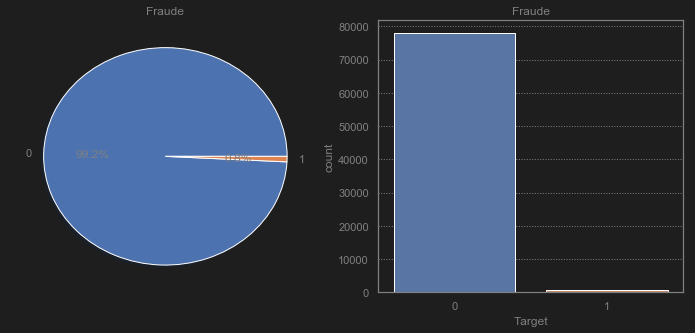

In [57]:
f,ax=plt.subplots(1,2,figsize=(12,5))
df["Target"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Fraude')
ax[0].set_ylabel('')
sns.countplot("Target",data=df,ax=ax[1])
ax[1].set_title('Fraude')
plt.show()

In [62]:
df_f.dtypes

1                              uint8
2                              uint8
3                              uint8
4                              uint8
5                              uint8
6                              uint8
7                              uint8
8                              uint8
9                              uint8
11                             uint8
13                             uint8
14                             uint8
15                             uint8
16                             uint8
17                             uint8
18                             uint8
19                             uint8
20                             uint8
21                             uint8
22                             uint8
23                             uint8
24                             uint8
25                             uint8
26                             uint8
27                             uint8
28                             uint8
29                             uint8
3

## Data resampling: 

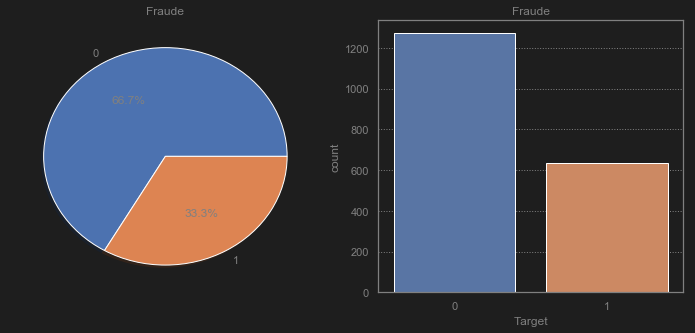

In [59]:
from sklearn.utils import resample

df_majority = df_f[df_f['Target'] == 0]
df_minority = df_f[df_f['Target'] == 1]


n_samples = (df_f['Target'].value_counts().values[1])*(2)

majority_resamp_df = resample(df_majority, replace = False, n_samples = int(n_samples), random_state = 0)
resamp_df = pd.concat([majority_resamp_df, df_minority])

f,ax=plt.subplots(1,2,figsize=(12,5))
resamp_df["Target"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Fraude')
ax[0].set_ylabel('')
sns.countplot("Target",data=resamp_df,ax=ax[1])
ax[1].set_title('Fraude')
plt.show()


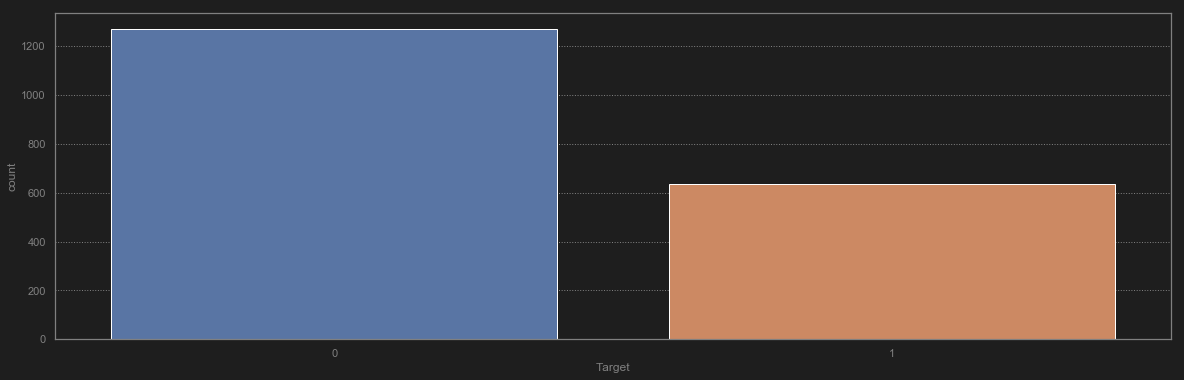

In [59]:
plt.figure(figsize = (20, 6))
sns.countplot(data = resamp_df, x = 'Target');

In [60]:
X = resamp_df.drop(['Target'], axis=1)
y = resamp_df['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2) 

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
##########################################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC

In [62]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

In [63]:
def best_model(model, x_train, y_train, x_test, y_test, grid_params):
    
    #GridSearchCV
    grid = GridSearchCV(model, grid_params, return_train_score=True).fit(x_train, y_train)
    estimator = grid.best_estimator_
    table = pd.DataFrame(grid.cv_results_).loc[:, 
                ['params', 'mean_test_score', 'std_test_score','mean_train_score', 
                 'std_train_score']].sort_values(by='mean_test_score', ascending=False)    
    params = grid.best_params_
    bestScore=grid.best_score_
    preds = estimator.predict(x_test)
    
    print(classification_report(y_test, preds))

    F1 = f1_score(y_true = y_test, y_pred = preds,pos_label='positive',average='micro') # pos_label / average => zednehom khater multiclass moch binair kim lokhrin
    print("F1Score : ",F1)

    return estimator, table, params,bestScore

# 1. KNN

In [ ]:
kN = KNeighborsClassifier()
est, table, params ,bestScore= best_model(kN, X_train, y_train,
                                X_test,y_test,
                                 grid_params=[{'n_neighbors':list(range(1,30))}])

In [176]:
est

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [177]:
table

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
17,{'n_neighbors': 18},0.778517,0.016107,0.785553,0.007560
18,{'n_neighbors': 19},0.775903,0.018944,0.787355,0.008176
28,{'n_neighbors': 29},0.775901,0.017563,0.781456,0.006275
20,{'n_neighbors': 21},0.775901,0.021222,0.784734,0.009761
19,{'n_neighbors': 20},0.775896,0.014848,0.784734,0.008662
27,{'n_neighbors': 28},0.775247,0.016655,0.781948,0.005537
25,{'n_neighbors': 26},0.775245,0.017446,0.783095,0.006228
21,{'n_neighbors': 22},0.775245,0.018638,0.785061,0.008010
26,{'n_neighbors': 27},0.775243,0.016980,0.781784,0.005364
16,{'n_neighbors': 17},0.774587,0.016834,0.787027,0.006633


In [178]:
bestScore

0.7785170898960677

In [136]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')
knn_model = knn.fit(X_train, y_train)

In [137]:
print('Accuracy of KNN  Model on training set: {:.2f}'
     .format(knn_model.score(X_train, y_train)))
print('Accuracy of KNN Model on test set: {:.2f}'
     .format(knn_model.score(X_test, y_test)))

Accuracy of KNN  Model on training set: 0.79
Accuracy of KNN Model on test set: 0.79


In [138]:
error = []

for i in range(1, 30):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Erreur')

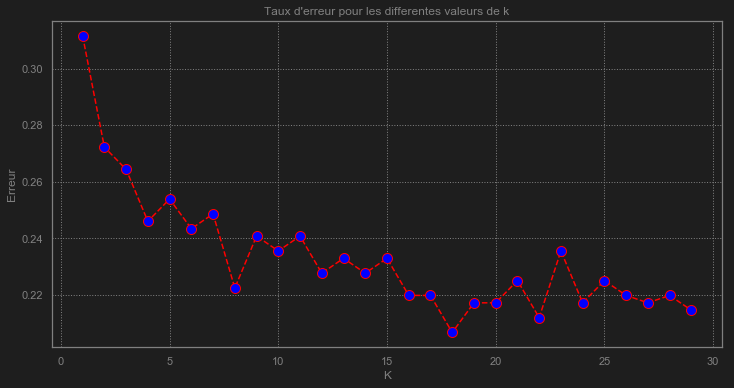

In [139]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux d\'erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

# 2. LinearSVC

In [179]:
sv = LinearSVC()
est, table, params,bestScore = best_model(sv, X_train, y_train,
                                X_test,y_test,
                                 grid_params=[{'C':[1, 2, 4, 6, 10,20]}])

precision    recall  f1-score   support

           0       0.71      1.00      0.83       266
           1       0.91      0.09      0.16       116

    accuracy                           0.72       382
   macro avg       0.81      0.54      0.49       382
weighted avg       0.77      0.72      0.63       382

F1Score :  0.7198952879581153


In [180]:
est

LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [181]:
SVC = LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

SVCModel =SVC.fit(X_train, y_train) 

In [182]:
print('Accuracy of svModel  Model on training set: {:.2f}'
     .format(SVCModel.score(X_train, y_train)))
print('Accuracy of svModel Model on test set: {:.2f}'
     .format(SVCModel.score(X_test, y_test)))

Accuracy of svModel  Model on training set: 0.67
Accuracy of svModel Model on test set: 0.67


# 3. GaussianNB

In [144]:
gnb = GaussianNB()
est, table, params,bestScore = best_model(gnb, X_train, y_train,
                                X_test,y_test,
                                grid_params=[{'var_smoothing':[1e-2, 1e-3, 1e-4, 1e-5,
                                                               1e-6, 1e-7, 1e-8, 1e-9]}])

precision    recall  f1-score   support

           0       0.73      0.80      0.76       266
           1       0.41      0.32      0.36       116

    accuracy                           0.65       382
   macro avg       0.57      0.56      0.56       382
weighted avg       0.63      0.65      0.64       382

F1Score :  0.6544502617801047


In [145]:
est

GaussianNB(priors=None, var_smoothing=0.0001)

In [146]:
GNB =GaussianNB(priors=None, var_smoothing=0.0001)
GNBModel =GNB.fit(X_train, y_train) 

In [147]:
print('Accuracy of GaussianNB  Model on training set: {:.2f}'
     .format(GNBModel.score(X_train, y_train)))
print('Accuracy of GaussianNB Model on test set: {:.2f}'
     .format(GNBModel.score(X_test, y_test)))

Accuracy of GaussianNB  Model on training set: 0.67
Accuracy of GaussianNB Model on test set: 0.65


# 5.XGBoost

In [183]:
#Solution pour une erreur les nom de colonnes contiennent les symboles [ or ] or <
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [184]:
xgb = XGBClassifier(learning_rate=0.05)
est, table, params, bestScore = best_model(xgb, X_train, y_train,
                                X_test,y_test,
                                grid_params=[{'n_estimators':[100, 200, 400, 800, 1000]}])

precision    recall  f1-score   support

           0       0.82      0.88      0.85       266
           1       0.67      0.55      0.61       116

    accuracy                           0.78       382
   macro avg       0.75      0.72      0.73       382
weighted avg       0.77      0.78      0.78       382

F1Score :  0.7827225130890052


In [ ]:
est

In [186]:
XGBModel=XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

XGBBoostModel =XGBModel.fit(X_train, y_train)  

In [187]:
print('Accuracy of XGBBoostClassifier  Model on training set: {:.2f}'
     .format(XGBBoostModel.score(X_train, y_train)))
print('Accuracy of XGBBoostClassifier Model on test set: {:.2f}'
     .format(XGBBoostModel.score(X_test, y_test)))

Accuracy of XGBBoostClassifier  Model on training set: 0.86
Accuracy of XGBBoostClassifier Model on test set: 0.78


# 6.ADABoost

In [188]:
adab = AdaBoostClassifier(learning_rate=0.05)
est, table, params ,bestScore= best_model(adab, X_train, y_train,
                                X_test,y_test,
                                grid_params=[{'n_estimators':[100, 200, 400, 800, 1000]}])

precision    recall  f1-score   support

           0       0.83      0.88      0.85       266
           1       0.67      0.59      0.63       116

    accuracy                           0.79       382
   macro avg       0.75      0.73      0.74       382
weighted avg       0.78      0.79      0.78       382

F1Score :  0.7879581151832461


In [189]:
est

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=100, random_state=None)

In [190]:
AdaModel=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=None)

AdaBoostModel =AdaModel.fit(X_train, y_train)          

In [191]:
print('Accuracy of AdaBoostClassifier  Model on training set: {:.2f}'
     .format(AdaBoostModel.score(X_train, y_train)))
print('Accuracy of AdaBoostClassifier Model on test set: {:.2f}'
     .format(AdaBoostModel.score(X_test, y_test)))

Accuracy of AdaBoostClassifier  Model on training set: 0.80
Accuracy of AdaBoostClassifier Model on test set: 0.79


ADA green 0.72
XGB pink 0.72
GNB orange 0.56
SVC yellow 0.58
KNN black 0.73


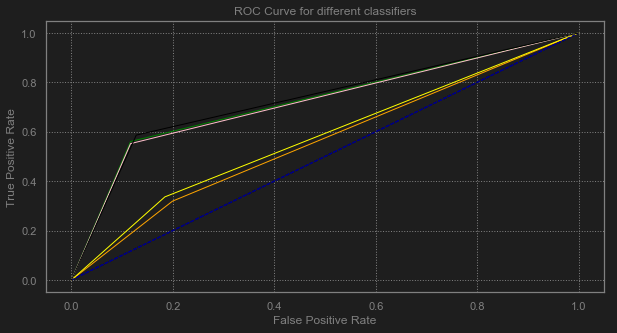

In [193]:
from sklearn.metrics import roc_curve, auc

est = [AdaBoostModel,XGBModel,GNBModel,SVCModel,knn_model]
colors = ['green', 'pink', 'orange', 'yellow', 'black', 'red']
algorithmes=['ADA','XGB','GNB','SVC','KNN']
lw = 1
couleur = 0
algo=0

plt.figure(figsize=(10,5))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for different classifiers')
for e in est : 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    fpr, tpr, _ = roc_curve(y_test, e.predict(X_test))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,color=colors[couleur], lw=lw, label='XGB ROC curve (area = %0.2f)'% roc_auc)
    
    print(algorithmes[algo],colors[couleur], '%0.2f'%roc_auc)
    
    algo+=1
    couleur += 1

## Export the model

In [197]:

import pickle 
pickle.dump(AdaBoostModel, open('../Models/model.pkl','wb'))
model = pickle.load(open('../Models/model.pkl','rb'))

## Test the model

In [195]:
model_columns = list(X.columns)
with open('../Models/model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)

In [196]:
y_pred_ada = model.predict(X_test)

In [ ]:
# On test police_id : 445379.0 / 300346.0

resamp_df.where(df['police_id'] ==445379.0).dropna(how='all')

In [95]:
# Test
g=np.array([2.0,2.0,2.0,90.0,90.0,90.0,1.0,0.0,1.0,1.0,5.0,1.0,640.0,3.0,2.0,2.0,620.0,0.0,1.0,684.0,1049.0,684.0,1049.0])


In [96]:
g=pd.DataFrame((g.reshape(1,23)))

In [97]:
g

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,2.0,2.0,2.0,90.0,90.0,90.0,1.0,0.0,1.0,1.0,5.0,1.0,640.0,3.0,2.0,2.0,620.0,0.0,1.0,684.0,1049.0,684.0,1049.0


In [98]:
prediction=model.predict(g)

In [99]:
output = round(prediction[0], 2)

In [100]:
# Result of prediction 1: fraud / 0: No fraud
output

1

## Export DataFrame from model

In [63]:
df_f.to_csv("FraudeTable.csv")

In [64]:
df_f.shape

(78516, 586)

In [65]:
df_f.head()

,1,2,3,4,5,6,7,8,9,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,...,911,915,916,918,920,924,939,945,946,950,951,952,954,955,958,959,960,961,962,963,964,965,966,967,970,990,104001,104002,104003,classeBonusMalus,classeBonusMalusCompagnie,classeBonusMalusCGA,coefBonusMalus,coefBonusMalusCompagnie,coefBonusMalusCGA,CONTRAT_EN_COURS,bonus,ETAT_VEHICULE,dernierClassBonusMallus,typeIntermediaire,naturePolice,typePolice,dateEcheancePolice,verouillageModifPolice,Etat_Police,jour_Affectation,jour_Calcule,jour_Occurence,jour_EffetPolice,Target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,100,100.0,100,1,0,1,1,1,2,2,511.0,0,2,1104,1469,1469.0,3296,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,80,80.0,80,1,0,1,1,3,2,2,818.0,0,2,1005,1370,1370.0,5023,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,90,90.0,90,1,0,1,1,1,2,2,920.0,0,2,1337,1337,1337.0,4259,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,80,80.0,80,1,0,1,1,1,2,2,1111.0,0,2,920,1285,1285.0,4207,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,80,80.0,80,1,0,1,1,1,2,2,1114.0,0,2,1282,1282,1282.0,3109,0
